<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/Autoenc_denoisingMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Import dataset

In [2]:
# import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

In [3]:
# extract labels (number IDs) and remove from data
labels = data[:,0]
data = data[:,1:]




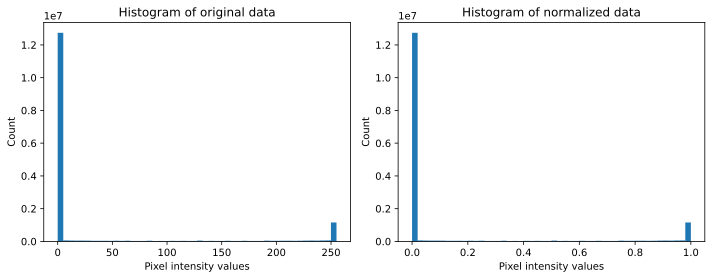

In [6]:
#normalize the data to a range of [0 1]
dataNorm=data/np.max(data)
#convert to tensor
dataT=torch.tensor(dataNorm).float()
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].hist(data.flatten(),50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')
ax[1].hist(dataNorm.flatten(),50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')
plt.tight_layout()
plt.show()

Create train/TEST GROUPS USING DataLoader

Create the DL model

In [9]:
def createTheMNISTAE():
  class aenet(nn.Module):
    def __init__(self):
      super().__init__()
      ###input layer
      self.input = nn.Linear(784,250)
      ###encoder layer
      self.enc = nn.Linear(250,50)
      ##latent layer
      self.lat = nn.Linear(50,250)
      ###output layer
      self.output = nn.Linear(250,784)
    #forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.enc(x) )
      x = F.relu( self.lat(x) )
      y=torch.sigmoid( self.output(x) )
      return y
      # NEW HERE:MSEloss USED
  net = aenet()
  #loss function
  lossfun = nn.MSELoss()
  #optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)
  return net,lossfun, optimizer

In [10]:
#test the model
net,lossfun,optimizer=createTheMNISTAE()
X=dataT[:5,:]
yHat=net(X)
print(yHat.shape)

torch.Size([5, 784])


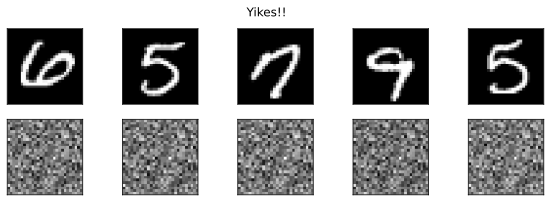

In [11]:
#let's see what the model did!
fig,axs=plt.subplots(2,5,figsize=(10,3))
for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach(),cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach(),cmap='gray')
  axs[0,i].set_xticks([]),axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]),axs[1,i].set_yticks([])
plt.suptitle('Yikes!!')
plt.show()


Create a function that trains the model

In [12]:

def function2trainTheModel():

  # number of epochs
  numepochs = 10000

  # initialize losses
  losses    = torch.zeros(numepochs)
  #create a new model
  net,lossfun,optimizer=createTheMNISTAE()

  # loop over epochs
  for epochi in range(numepochs):
    #select a random set of images
    randomidx=np.random.choice(dataT.shape[0],size=32)
    X=dataT[randomidx,:]
    # forward pass and loss
    yHat = net(X)
    loss = lossfun(yHat,X)
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #losses in this epoch
    losses[epochi] = loss.item()
  #end of epochs
  return losses,net

Run the model and show the results

Final loss: 0.0079


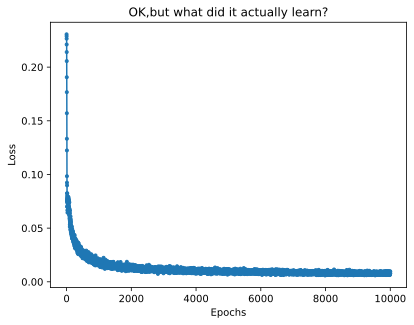

In [13]:
#train the model(90s)
losses,net=function2trainTheModel()
print(f'Final loss: {losses[-1]:.4f}')
#visualize
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('OK,but what did it actually learn?')
plt.show()

Show the results!!

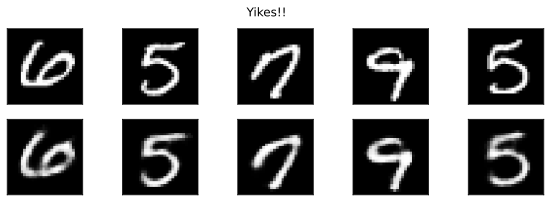

In [14]:
#Repeat the visualization when testing the model
X=dataT[:5,:]
yHat=net(X)
#let's see what the model did!
fig,axs=plt.subplots(2,5,figsize=(10,3))
for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach(),cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach(),cmap='gray')
  axs[0,i].set_xticks([]),axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]),axs[1,i].set_yticks([])
plt.suptitle('Yikes!!')
plt.show()

Add noise to see a use case of an autoencoder

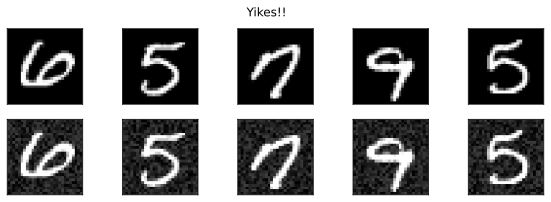

In [16]:
#grab a small set of images
X=dataT[:10,:]
#add noise
Xnoise=X+torch.rand_like(X)/4
#clip at 1
Xnoise[Xnoise>1]=1

fig,axs=plt.subplots(2,5,figsize=(10,3))

#show the noisy images
for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach(),cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach(),cmap='gray')
  axs[0,i].set_xticks([]),axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]),axs[1,i].set_yticks([])
plt.suptitle('Yikes!!')
plt.show()


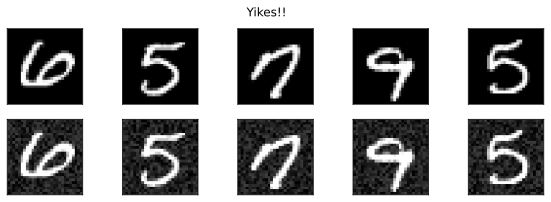

In [17]:
#run through the model
yHat=net(Xnoise)
#let's see what the model did!

fig,axs=plt.subplots(2,5,figsize=(10,3))
#show the noisy images
for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach(),cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach(),cmap='gray')
  axs[0,i].set_xticks([]),axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]),axs[1,i].set_yticks([])
plt.suptitle('Yikes!!')
plt.show()
